In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tifffile as tf
import numpy as np
import zarr as zr
from skimage.measure import regionprops_table
from skimage.util import map_array

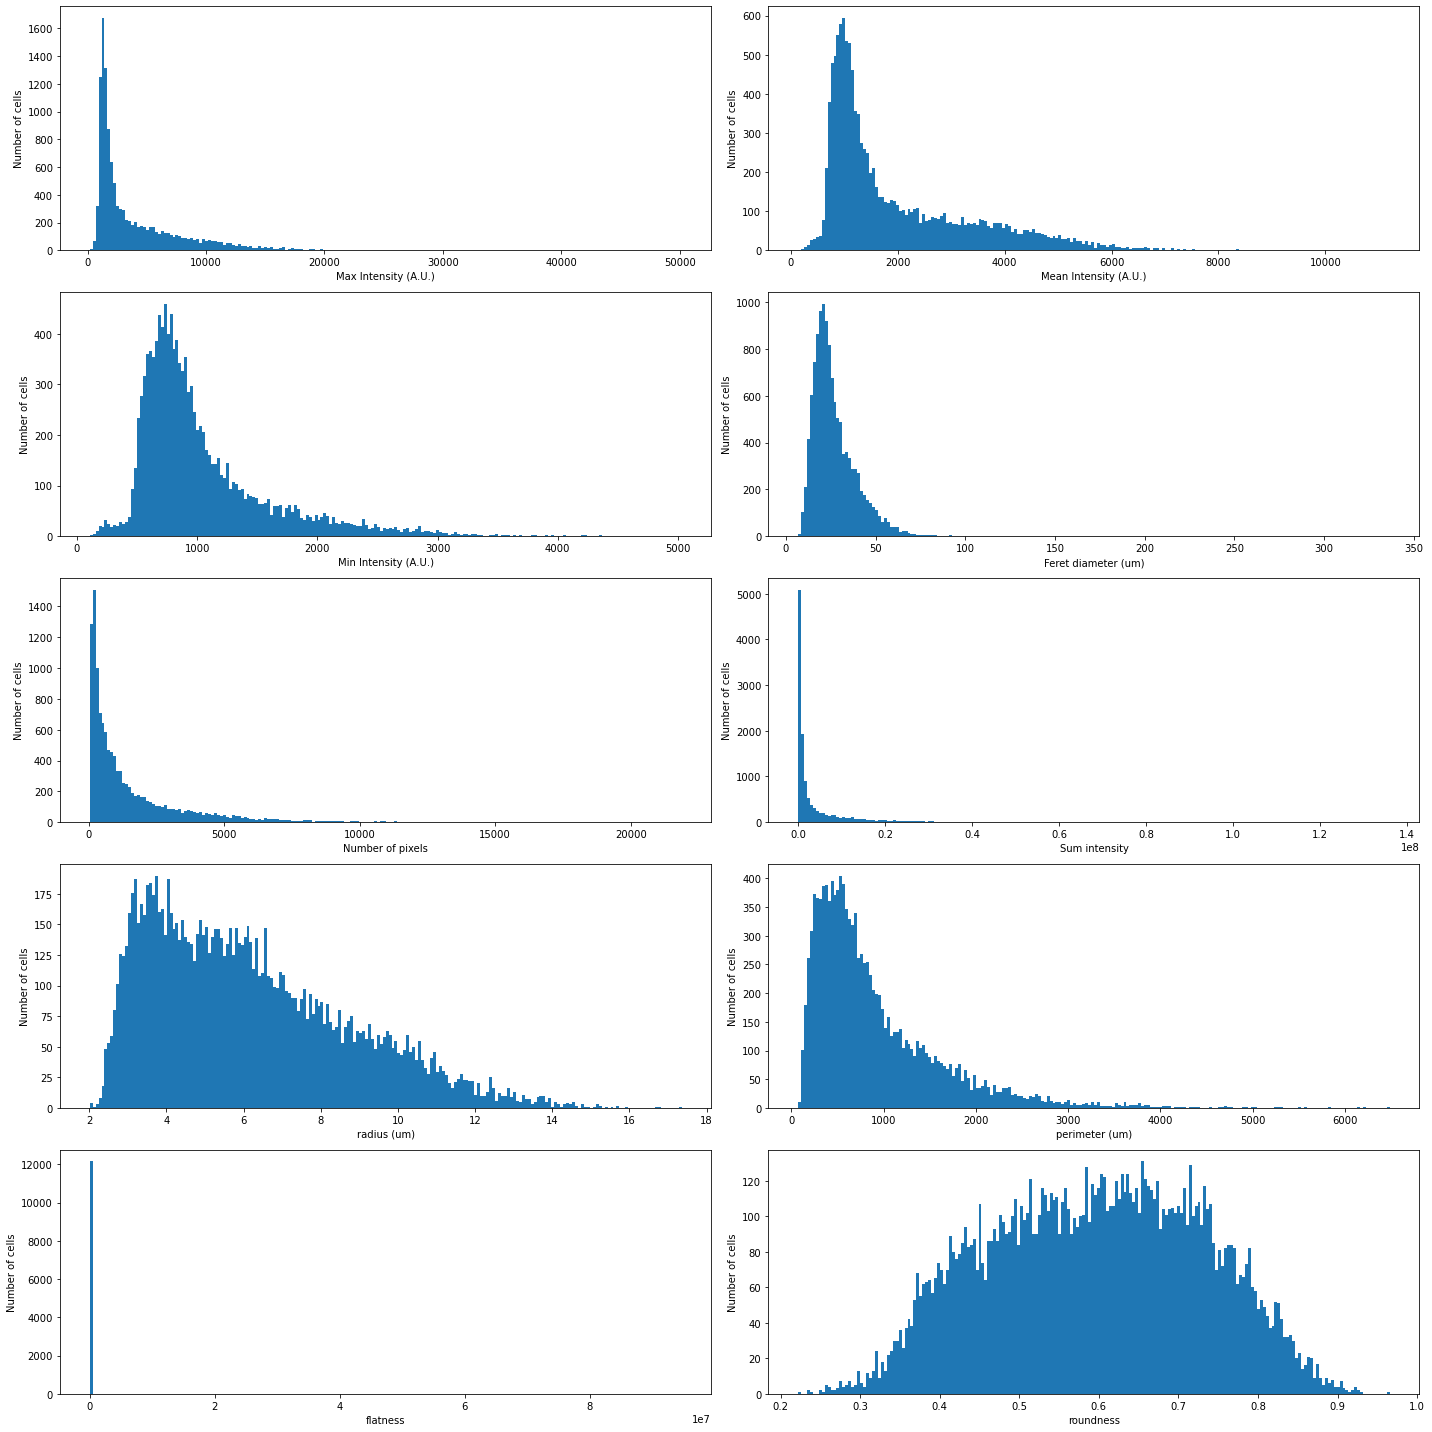

In [34]:
content = pd.read_csv(r"D:\EHG\Explants\CYP17A1\Results\C3-EH3930_DMSOEtOH_Explant-3_5-COUPTFII_6-INSL3_7-CYP17A1-1s_12x_1z_Blaze_C0.ome_Processed.aivia_Processed.aivia.tif28_cp_masks.tif16.csv")
labels = zr.load(r"D:\EHG\Explants\CYP17A1\Labels\C3-EH3930_DMSOEtOH_Explant-3_5-COUPTFII_6-INSL3_7-CYP17A1-1s_12x_1z_Blaze_C0.ome_Processed.aivia_Processed.aivia.tif28_cp_masks.tif16.zarr")

max_vector = content['maximum']
mean_vector = content['mean']
min_vector = content['minimum']
feret_vector = content['feret_diameter']
pixel_vector = content['number_of_pixels']
sum_vector = content['sum']
rad_vector = content['equivalent_spherical_radius']
per_vector = content['perimeter']
flat_vector = content['flatness']
rou_vector = content['roundness']
    
fig, axes = plt.subplots(5, 2, figsize=(20,20))
ax = axes.ravel()


ax[0].hist(max_vector, bins=200)
ax[0].set_ylabel('Number of cells')
ax[0].set_xlabel('Max Intensity (A.U.)')

ax[1].hist(mean_vector, bins=200)
ax[1].set_ylabel('Number of cells')
ax[1].set_xlabel('Mean Intensity (A.U.)')

ax[2].hist(min_vector, bins=200)
ax[2].set_ylabel('Number of cells')
ax[2].set_xlabel('Min Intensity (A.U.)')

ax[3].hist(feret_vector, bins=200)
ax[3].set_ylabel('Number of cells')
ax[3].set_xlabel('Feret diameter (um)') 

ax[4].hist(pixel_vector, bins=200)
ax[4].set_ylabel('Number of cells')
ax[4].set_xlabel('Number of pixels')

ax[5].hist(sum_vector, bins=200)
ax[5].set_ylabel('Number of cells')
ax[5].set_xlabel('Sum intensity')

ax[6].hist(rad_vector, bins=200)
ax[6].set_ylabel('Number of cells')
ax[6].set_xlabel('radius (um)')

ax[7].hist(per_vector, bins=200)
ax[7].set_ylabel('Number of cells')
ax[7].set_xlabel('perimeter (um)')

ax[8].hist(flat_vector, bins=200)
ax[8].set_ylabel('Number of cells')
ax[8].set_xlabel('flatness')

ax[9].hist(rou_vector, bins=200)
ax[9].set_ylabel('Number of cells')
ax[9].set_xlabel('roundness')

fig.tight_layout()

In [32]:
int_labels = map_array(
    labels,
    label_ids := np.asarray(content['label']),
    label_ids * np.asarray(content['equivalent_spherical_radius'] > 4),
)

In [33]:
cont2 = regionprops_table(int_labels)
content2 = pd.DataFrame(cont2)
content2

,label,bbox-0,bbox-1,bbox-2,bbox-3,bbox-4,bbox-5
0,1,6,966,806,21,2400,1947
1,2,13,1047,812,21,1074,843
2,3,15,927,1056,20,952,1081
3,4,16,895,933,19,917,970
4,6,16,1097,881,19,1121,924
...,...,...,...,...,...,...,...
9418,11824,184,1978,1170,185,1999,1190
9419,11825,187,1889,1099,188,1921,1135
9420,11827,190,1903,1025,191,1925,1048
9421,11828,191,1977,1096,194,2003,1120


In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20,20))
ax = axes.ravel()

ax[0].hist(min_vector2, bins=200)
ax[0].set_ylabel('Number of cells')
ax[0].set_xlabel('Min Intensity (A.U.)')